------------------------------------------------------------ "Heart diesease prediction" --------------------------------------------------------------

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hd = pd.read_csv(r"C:\Users\Admin\Downloads\Projects\heart_disease\Heart Disease\dataset.csv")
hd

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
hd.value_counts('resting ecg')

resting ecg
0    684
2    325
1    181
Name: count, dtype: int64

------------------------------------------------------------ "Data Preprocessing" --------------------------------------------------------------------

In [4]:
y = hd.target
feature = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']
X = hd[feature]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

------------------------------------------------------------ "Data analysis" --------------------------------------------------------------------

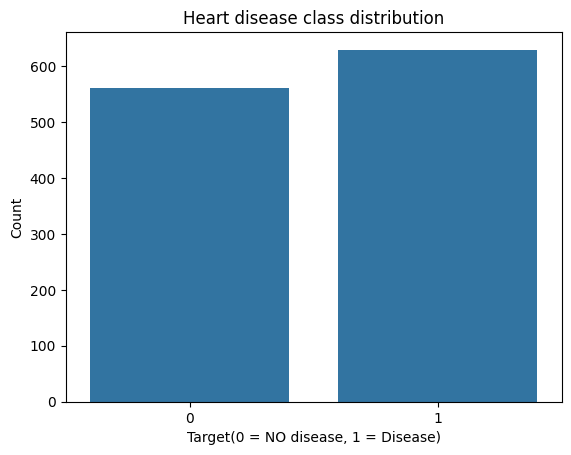

In [5]:
# Target class Distribution
sns.countplot(x = 'target', data = hd)
plt.title('Heart disease class distribution')
plt.xlabel('Target(0 = NO disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

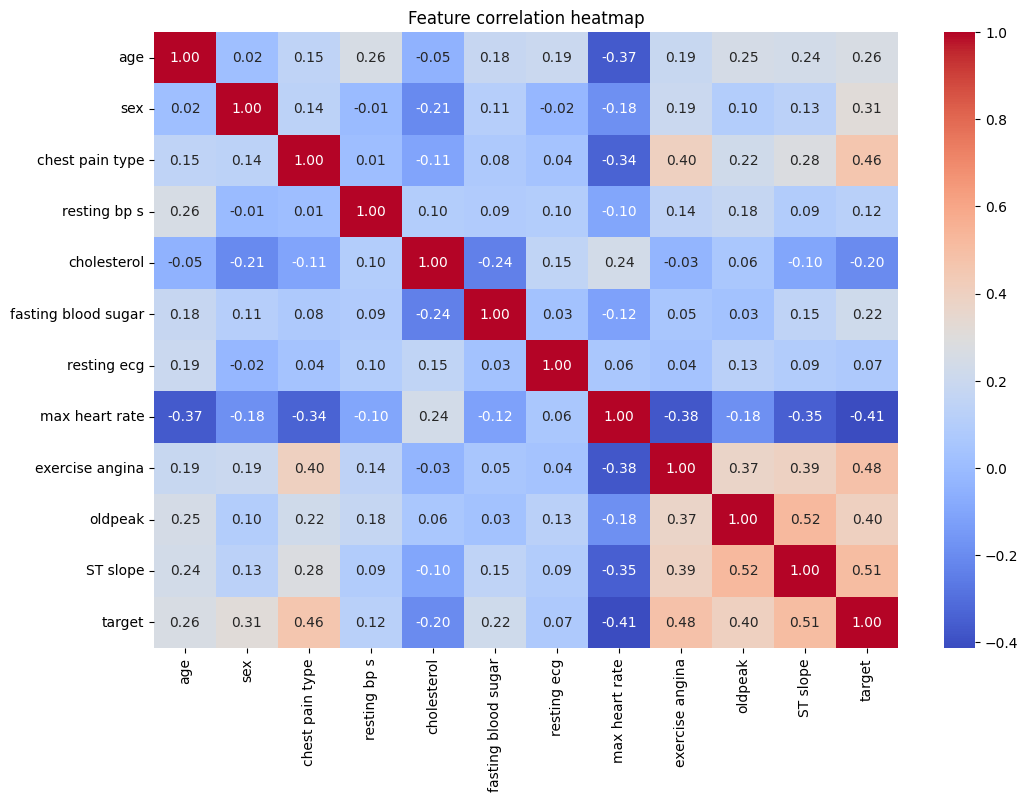

In [6]:
#Plot correlation heatmap
plt.figure(figsize = (12,8))
sns.heatmap(hd.corr(), annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title("Feature correlation heatmap")
plt.show()

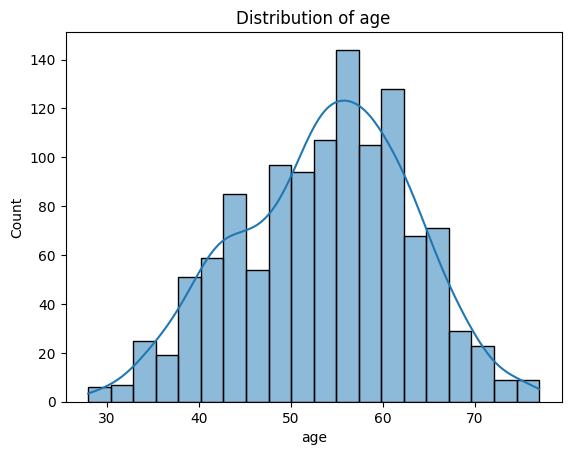

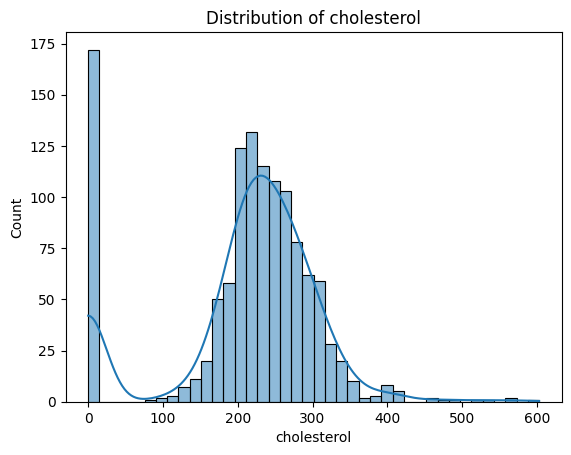

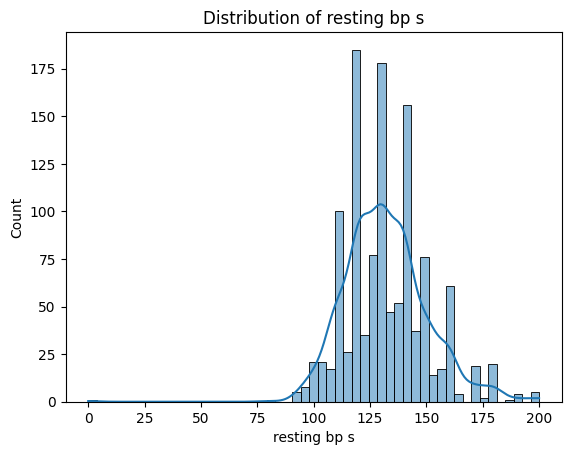

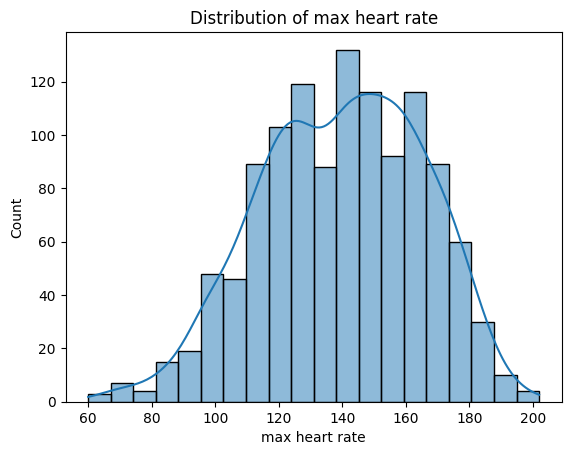

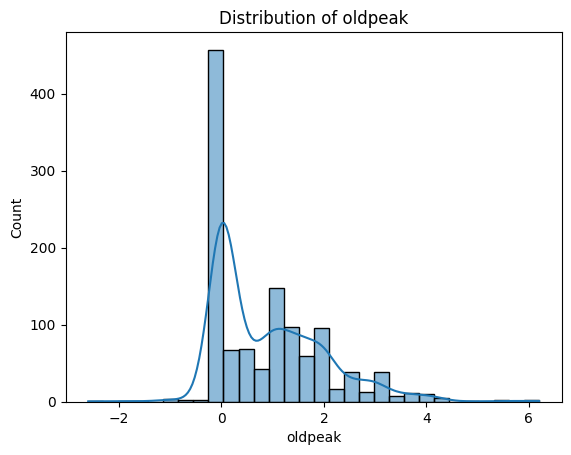

In [7]:
num_col = ['age', 'cholesterol', 'resting bp s', 'max heart rate', 'oldpeak']
for col in num_col:
    plt.figure()
    sns.histplot(hd[col], kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()

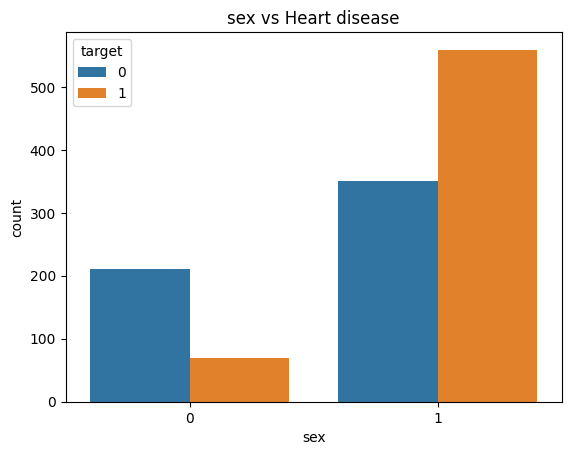

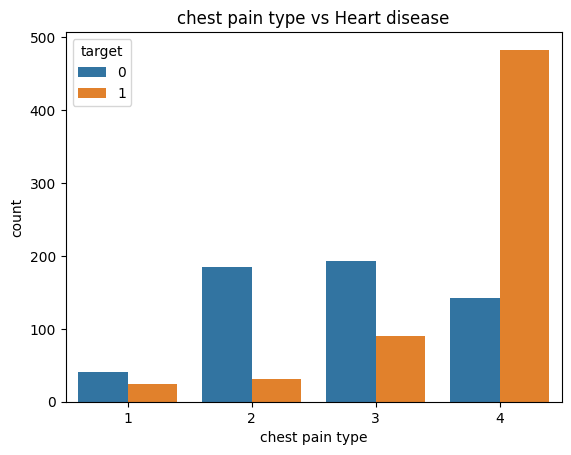

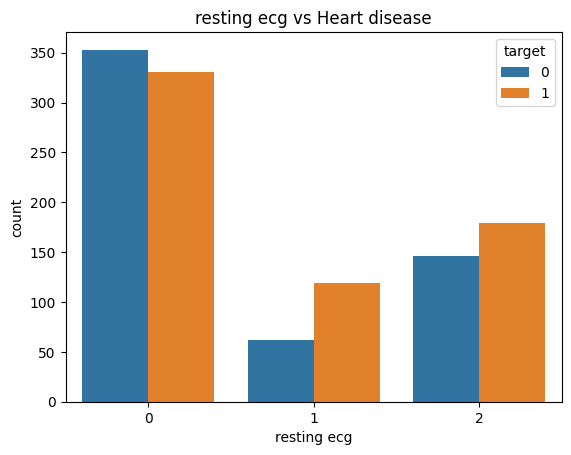

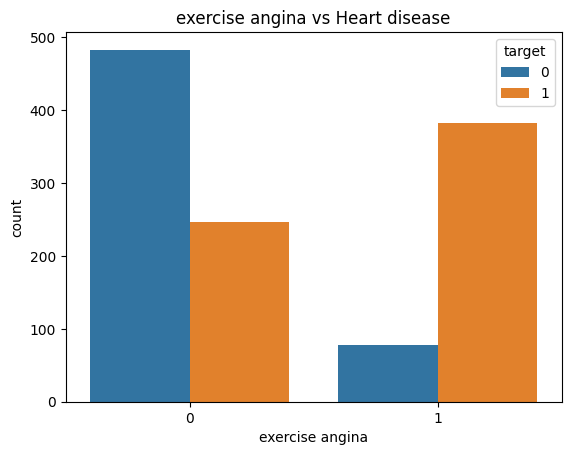

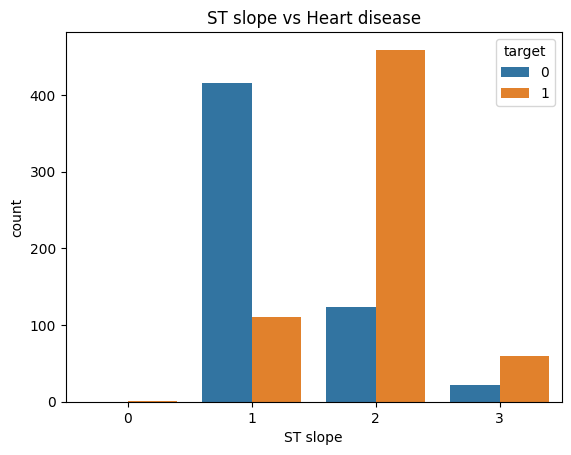

In [8]:
cat_cols = ['sex', 'chest pain type', 'resting ecg', 'exercise angina', 'ST slope']
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue = 'target', data = hd)
    plt.title(f'{col} vs Heart disease')
    plt.show()

------------------------------------------------------------ "XGBClassifier model" --------------------------------------------------------------------

In [9]:
XGB_model = XGBClassifier()

In [10]:
my_pipeline = Pipeline(steps = [
    ('XGB_model', XGB_model)
])

In [11]:
my_pipeline.fit(X_train, y_train)

,steps,"[('XGB_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [12]:
prediction = my_pipeline.predict(X_val)

--------------------------------------------------------- "RandomForestClassifier model" --------------------------------------------------------------

In [13]:
RF_model = RandomForestClassifier(random_state = 0)

In [14]:
my_pipeline1 = Pipeline(steps = [
    ('RF_model', RF_model)
])

In [15]:
my_pipeline1.fit(X_train, y_train)

,steps,"[('RF_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [16]:
cv_scores = cross_val_score(my_pipeline1, X, y, cv = 5, scoring = "f1")

In [17]:
prediction2 = my_pipeline1.predict(X_val)

-------------------------------------------------------- "Comparing the prediction of both models" ----------------------------------------------------

In [18]:
# Prediction result using XGBoost model
print("Accuracy:", accuracy_score(y_val, prediction))
print("Precision:", precision_score(y_val, prediction))
print("Recall:", recall_score(y_val, prediction))
print("F1 Score:", f1_score(y_val, prediction))

Accuracy: 0.8991596638655462
Precision: 0.9081081081081082
Recall: 0.8983957219251337
F1 Score: 0.9032258064516129


In [19]:
# Prediction result using RandomForestClassifier model
print("Accuracy:", accuracy_score(y_val, prediction2))
print("Precision:", precision_score(y_val, prediction2))
print("Recall:", recall_score(y_val, prediction2))
print("F1 Score:", f1_score(y_val, prediction2))

Accuracy: 0.8991596638655462
Precision: 0.8952879581151832
Recall: 0.9144385026737968
F1 Score: 0.9047619047619048


In [20]:
# Prediction result in RandomForestClassifier model using "Cross validation"
print("cross_validation f1 score:", cv_scores)
print("Average f1 score:", cv_scores.mean())

cross_validation f1 score: [0.90909091 0.88644689 0.96031746 0.9375     0.97188755]
Average f1 score: 0.9330485612112118


In [21]:
cm = confusion_matrix(y_val, prediction2)

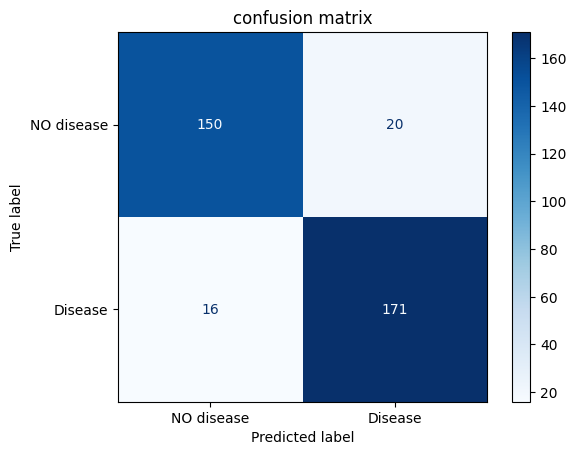

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["NO disease", "Disease"])
disp.plot(cmap = "Blues")
plt.title("confusion matrix")
plt.show()

In [24]:
import pickle

In [28]:
models = {
    'random_forest': RF_model,
    'xgboost': XGB_model
}

In [29]:
with open('model.pkl', 'wb') as file:
    pickle.dump(models, file)